# Milne's Methods Assignment: Real-Life Problems


### What is Milne's Method?

Milne's method is a **predictor-corrector method** used to solve first-order ordinary differential equations (ODEs) of the form:

$$\frac{dy}{dx} = f(x, y)$$

with initial condition $y(x_0) = y_0$

### Mathematical Formulation:

#### Predictor Formula (Milne's Predictor):
$$y_{n+1}^{(p)} = y_{n-3} + \frac{4h}{3}[2f_{n-2} - f_{n-1} + 2f_n]$$

#### Corrector Formula (Simpson's 1/3 Rule):
$$y_{n+1}^{(c)} = y_{n-1} + \frac{h}{3}[f_{n-1} + 4f_n + f_{n+1}^{(p)}]$$

Where:
- $h$ = step size
- $f_i = f(x_i, y_i)$
- $y_{n+1}^{(p)}$ = predicted value
- $y_{n+1}^{(c)}$ = corrected value

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)

Libraries imported successfully!
NumPy version: 2.3.2
Matplotlib version: 3.10.5



### Complete Implementation with Error Handling

In [5]:
def runge_kutta_4th_order(f, x0, y0, h, n_steps):
    """
    4th order Runge-Kutta method to generate starting values for Milne's method
    """
    x = [x0]
    y = [y0]
    
    for i in range(n_steps):
        xi = x[i]
        yi = y[i]
        
        k1 = h * f(xi, yi)
        k2 = h * f(xi + h/2, yi + k1/2)
        k3 = h * f(xi + h/2, yi + k2/2)
        k4 = h * f(xi + h, yi + k3)
        
        y_next = yi + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_next = xi + h
        
        x.append(x_next)
        y.append(y_next)
    
    return np.array(x), np.array(y)

def milnes_method(f, x0, y0, x_end, h, tolerance=1e-6, max_iterations=10):
    """
    Complete implementation of Milne's Predictor-Corrector Method
    
    Parameters:
    - f: function dy/dx = f(x, y)
    - x0: initial x value
    - y0: initial y value  
    - x_end: final x value
    - h: step size
    - tolerance: convergence tolerance for corrector
    - max_iterations: maximum iterations for corrector
    
    Returns:
    - x_values: array of x values
    - y_values: array of y values
    - errors: estimated errors at each step
    """
    
    # Generate starting values using 4th order Runge-Kutta
    print("Generating starting values using Runge-Kutta 4th order...")
    x_start, y_start = runge_kutta_4th_order(f, x0, y0, h, 3)
    
    # Initialize arrays
    n_points = int((x_end - x0) / h) + 1
    x_values = np.zeros(n_points)
    y_values = np.zeros(n_points)
    errors = np.zeros(n_points)
    
    # Set starting values
    x_values[:4] = x_start
    y_values[:4] = y_start
    
    print(f"Starting values:")
    for i in range(4):
        print(f"x[{i}] = {x_values[i]:.6f}, y[{i}] = {y_values[i]:.6f}")
    
    # Apply Milne's method for remaining points
    print(f"\nApplying Milne's method from x = {x_values[3]:.6f} to x = {x_end:.6f}")
    
    for i in range(3, n_points - 1):
        # Predictor step (Milne's predictor formula)
        f_vals = [f(x_values[j], y_values[j]) for j in range(i-2, i+1)]
        
        y_pred = y_values[i-3] + (4*h/3) * (2*f_vals[0] - f_vals[1] + 2*f_vals[2])
        x_next = x_values[i] + h
        
        # Corrector step with iteration (Simpson's 1/3 rule)
        y_corr = y_pred
        for iteration in range(max_iterations):
            f_pred = f(x_next, y_corr)
            y_new = y_values[i-1] + (h/3) * (f_vals[1] + 4*f_vals[2] + f_pred)
            
            # Check convergence
            if abs(y_new - y_corr) < tolerance:
                break
            y_corr = y_new
        
        # Store results
        x_values[i+1] = x_next
        y_values[i+1] = y_corr
        
        # Estimate error (difference between predictor and corrector)
        errors[i+1] = abs(y_corr - y_pred)
        
        if (i+1) % 5 == 0:  # Print progress every 5 steps
            print(f"Step {i+1}: x = {x_next:.6f}, y = {y_corr:.6f}, error = {errors[i+1]:.8f}")
    
    return x_values, y_values, errors

# Test the implementation
print("Milne's Method Implementation Complete!")
print("Functions available:")
print("- runge_kutta_4th_order(): For generating starting values")  
print("- milnes_method(): Complete Milne's predictor-corrector method")

Milne's Method Implementation Complete!
Functions available:
- runge_kutta_4th_order(): For generating starting values
- milnes_method(): Complete Milne's predictor-corrector method


## Real-Life Problems Using Milne's Method 

### Problem 1: Population Growth Model
**Real-Life Application:** Modeling the growth of a bacterial colony in a laboratory

**Mathematical Model:**
The rate of population growth is proportional to the current population:
$$\frac{dP}{dt} = kP$$

where:
- P(t) = population at time t
- k = growth rate constant
- Initial condition: P(0) = P₀

**Specific Problem:**
A bacterial colony starts with 1000 bacteria. The growth rate is 0.3 per hour. Find the population after 5 hours.

=== PROBLEM 1: BACTERIAL POPULATION GROWTH ===
Initial population: 1000 bacteria
Growth rate: 0.3 per hour
Time period: 0 to 5 hours
Step size: 0.1 hours

Generating starting values using Runge-Kutta 4th order...
Starting values:
x[0] = 0.000000, y[0] = 1000.000000
x[1] = 0.100000, y[1] = 1030.454534
x[2] = 0.200000, y[2] = 1061.836546
x[3] = 0.300000, y[3] = 1094.174283

Applying Milne's method from x = 0.300000 to x = 5.000000
Step 5: x = 0.500000, y = 1161.834242, error = 0.00000806
Step 10: x = 1.000000, y = 1349.858808, error = 0.00001013
Step 15: x = 1.500000, y = 1568.312186, error = 0.00001172
Step 20: x = 2.000000, y = 1822.118803, error = 0.00001366
Step 25: x = 2.500000, y = 2117.000020, error = 0.00001582
Step 30: x = 3.000000, y = 2459.603117, error = 0.00001843
Step 35: x = 3.500000, y = 2857.651126, error = 0.00002137
Step 40: x = 4.000000, y = 3320.116933, error = 0.00002487
Step 45: x = 4.500000, y = 3857.425545, error = 0.00002885
Step 50: x = 5.000000, y = 4481.68908

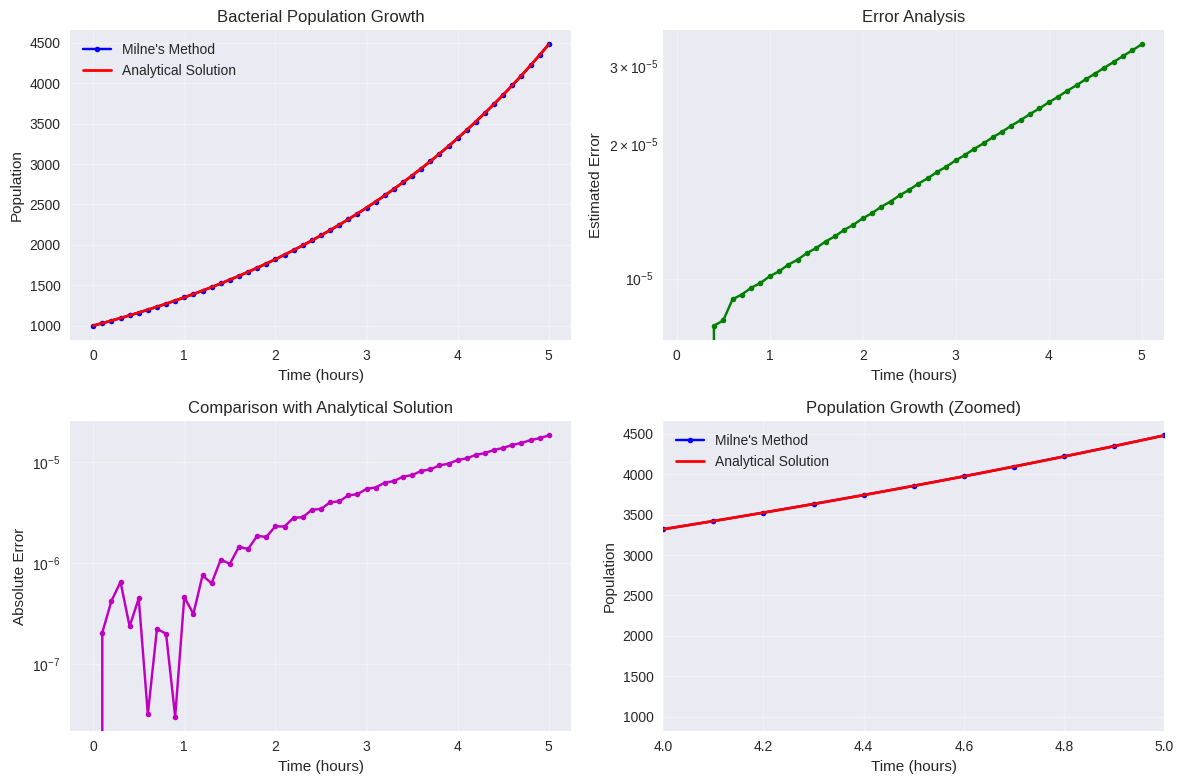


=== DETAILED RESULTS TABLE ===
    Time (h)  Milnes Method   Analytical  Abs Error  Rel Error (%)
0        0.0    1000.000000  1000.000000   0.000000            0.0
1        0.5    1161.834242  1161.834243   0.000000            0.0
2        1.0    1349.858808  1349.858808   0.000000            0.0
3        1.5    1568.312186  1568.312185   0.000001            0.0
4        2.0    1822.118803  1822.118800   0.000002            0.0
5        2.5    2117.000020  2117.000017   0.000003            0.0
6        3.0    2459.603117  2459.603111   0.000005            0.0
7        3.5    2857.651126  2857.651118   0.000007            0.0
8        4.0    3320.116933  3320.116923   0.000010            0.0
9        4.5    3857.425545  3857.425531   0.000014            0.0
10       5.0    4481.689089  4481.689070   0.000018            0.0


In [6]:
## Solution to Problem 1: Population Growth

# Define the differential equation: dP/dt = kP
def population_growth(t, P):
    k = 0.3  # growth rate constant
    return k * P

# Parameters
t0 = 0        # initial time
P0 = 1000     # initial population
t_end = 5     # final time (5 hours)
h = 0.1       # step size

print("=== PROBLEM 1: BACTERIAL POPULATION GROWTH ===")
print(f"Initial population: {P0} bacteria")
print(f"Growth rate: 0.3 per hour")
print(f"Time period: {t0} to {t_end} hours")
print(f"Step size: {h} hours")
print()

# Solve using Milne's method
t_values, P_values, errors = milnes_method(population_growth, t0, P0, t_end, h)

# Analytical solution for comparison
def analytical_solution(t):
    return P0 * np.exp(0.3 * t)

t_analytical = np.linspace(t0, t_end, 100)
P_analytical = analytical_solution(t_analytical)

# Display results
print(f"\nFinal Results after {t_end} hours:")
print(f"Milne's Method: {P_values[-1]:.2f} bacteria")
print(f"Analytical Solution: {analytical_solution(t_end):.2f} bacteria")
print(f"Absolute Error: {abs(P_values[-1] - analytical_solution(t_end)):.6f}")
print(f"Relative Error: {abs(P_values[-1] - analytical_solution(t_end))/analytical_solution(t_end)*100:.6f}%")

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t_values, P_values, 'bo-', label="Milne's Method", markersize=4)
plt.plot(t_analytical, P_analytical, 'r-', label='Analytical Solution', linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Population')
plt.title('Bacterial Population Growth')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.semilogy(t_values[1:], errors[1:], 'go-', markersize=4)
plt.xlabel('Time (hours)')
plt.ylabel('Estimated Error')
plt.title('Error Analysis')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
abs_errors = [abs(P_values[i] - analytical_solution(t_values[i])) for i in range(len(t_values))]
plt.semilogy(t_values, abs_errors, 'mo-', markersize=4)
plt.xlabel('Time (hours)')
plt.ylabel('Absolute Error')
plt.title('Comparison with Analytical Solution')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(t_values, P_values, 'bo-', label="Milne's Method", markersize=4)
plt.plot(t_analytical, P_analytical, 'r-', label='Analytical Solution', linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Population')
plt.title('Population Growth (Zoomed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(4, 5)

plt.tight_layout()
plt.show()

# Create a summary table
print("\n=== DETAILED RESULTS TABLE ===")
results_df = pd.DataFrame({
    'Time (h)': t_values[::5],  # Show every 5th point
    'Milnes Method': P_values[::5],
    'Analytical': [analytical_solution(t) for t in t_values[::5]],
    'Abs Error': [abs(P_values[i] - analytical_solution(t_values[i])) for i in range(0, len(t_values), 5)],
    'Rel Error (%)': [abs(P_values[i] - analytical_solution(t_values[i]))/analytical_solution(t_values[i])*100 for i in range(0, len(t_values), 5)]
})
print(results_df.round(6))

### Problem 2: Newton's Law of Cooling
**Real-Life Application:** Temperature of a hot cup of coffee cooling in room temperature

**Mathematical Model:**
Newton's law of cooling states that the rate of temperature change is proportional to the temperature difference:
$$\frac{dT}{dt} = -k(T - T_{room})$$

where:
- T(t) = temperature at time t
- k = cooling constant
- T_room = room temperature
- Initial condition: T(0) = T₀

**Specific Problem:**
A cup of coffee at 90°C is placed in a room at 20°C. The cooling constant k = 0.1 min⁻¹. Find the temperature after 30 minutes.

=== PROBLEM 2: NEWTON'S LAW OF COOLING ===
Initial temperature: 90°C
Room temperature: 20°C
Cooling constant: 0.1 min⁻¹
Time period: 0 to 30 minutes
Step size: 0.5 minutes

Generating starting values using Runge-Kutta 4th order...
Starting values:
x[0] = 0.000000, y[0] = 90.000000
x[1] = 0.500000, y[1] = 86.586060
x[2] = 1.000000, y[2] = 83.338620
x[3] = 1.500000, y[3] = 80.249559

Applying Milne's method from x = 1.500000 to x = 30.000000
Step 5: x = 2.500000, y = 74.516055, error = 0.00000584
Step 10: x = 5.000000, y = 62.457145, error = 0.00000502
Step 15: x = 7.500000, y = 53.065658, error = 0.00000400
Step 20: x = 10.000000, y = 45.751560, error = 0.00000302
Step 25: x = 12.500000, y = 40.055335, error = 0.00000246
Step 30: x = 15.000000, y = 35.619110, error = 0.00000180
Step 35: x = 17.500000, y = 32.164175, error = 0.00000152
Step 40: x = 20.000000, y = 29.473469, error = 0.00000105
Step 45: x = 22.500000, y = 27.377946, error = 0.00000000
Step 50: x = 25.000000, y = 25.745951,

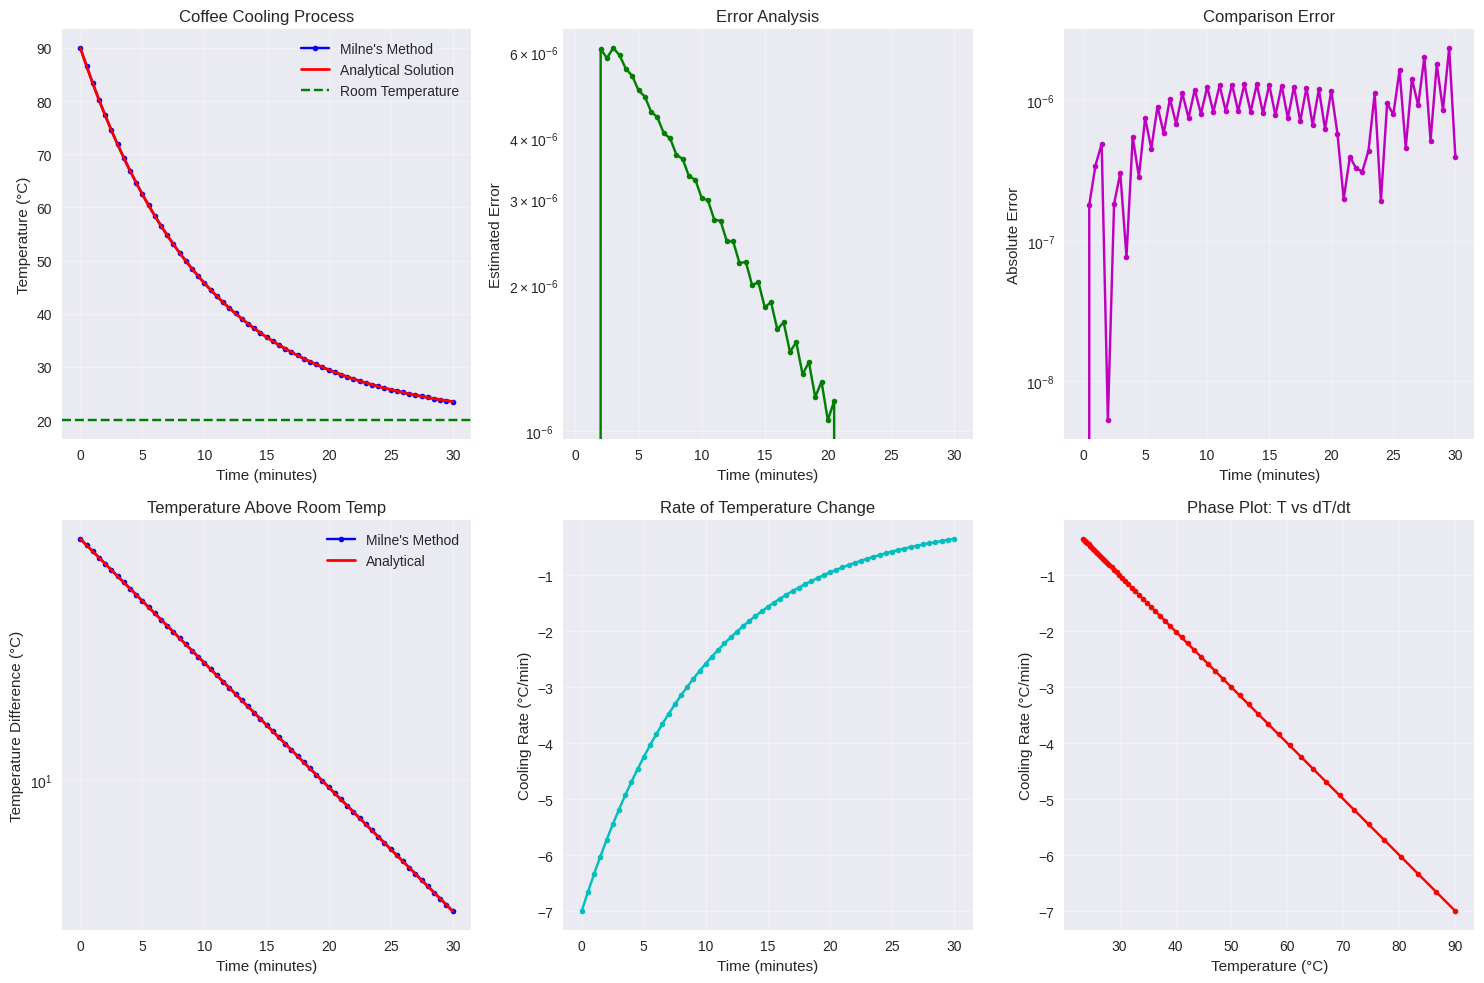


=== DETAILED RESULTS TABLE ===
    Time (min)  Milnes Method (°C)  Analytical (°C)  Abs Error  \
0          0.0           90.000000        90.000000   0.000000   
1          2.0           77.311153        77.311153   0.000000   
2          4.0           66.922403        66.922403   0.000001   
3          6.0           58.416814        58.416815   0.000001   
4          8.0           51.453026        51.453027   0.000001   
5         10.0           45.751560        45.751561   0.000001   
6         12.0           41.083594        41.083595   0.000001   
7         14.0           37.261786        37.261787   0.000001   
8         16.0           34.132755        34.132756   0.000001   
9         18.0           31.570921        31.570922   0.000001   
10        20.0           29.473469        29.473470   0.000001   
11        22.0           27.756221        27.756221   0.000000   
12        24.0           26.350257        26.350257   0.000000   
13        26.0           25.199151        25

In [7]:
## Solution to Problem 2: Newton's Law of Cooling

# Define the differential equation: dT/dt = -k(T - T_room)
def cooling_law(t, T):
    k = 0.1      # cooling constant
    T_room = 20  # room temperature
    return -k * (T - T_room)

# Parameters
t0 = 0        # initial time
T0 = 90       # initial temperature (°C)
t_end = 30    # final time (30 minutes)
h = 0.5       # step size

print("=== PROBLEM 2: NEWTON'S LAW OF COOLING ===")
print(f"Initial temperature: {T0}°C")
print(f"Room temperature: 20°C")
print(f"Cooling constant: 0.1 min⁻¹")
print(f"Time period: {t0} to {t_end} minutes")
print(f"Step size: {h} minutes")
print()

# Solve using Milne's method
t_values, T_values, errors = milnes_method(cooling_law, t0, T0, t_end, h)

# Analytical solution for comparison
def analytical_cooling(t):
    return 20 + (T0 - 20) * np.exp(-0.1 * t)

t_analytical = np.linspace(t0, t_end, 100)
T_analytical = analytical_cooling(t_analytical)

# Display results
print(f"\nFinal Results after {t_end} minutes:")
print(f"Milne's Method: {T_values[-1]:.2f}°C")
print(f"Analytical Solution: {analytical_cooling(t_end):.2f}°C")
print(f"Absolute Error: {abs(T_values[-1] - analytical_cooling(t_end)):.6f}°C")
print(f"Relative Error: {abs(T_values[-1] - analytical_cooling(t_end))/analytical_cooling(t_end)*100:.6f}%")

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(t_values, T_values, 'bo-', label="Milne's Method", markersize=4)
plt.plot(t_analytical, T_analytical, 'r-', label='Analytical Solution', linewidth=2)
plt.axhline(y=20, color='g', linestyle='--', label='Room Temperature')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Coffee Cooling Process')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.semilogy(t_values[1:], errors[1:], 'go-', markersize=4)
plt.xlabel('Time (minutes)')
plt.ylabel('Estimated Error')
plt.title('Error Analysis')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
abs_errors = [abs(T_values[i] - analytical_cooling(t_values[i])) for i in range(len(t_values))]
plt.semilogy(t_values, abs_errors, 'mo-', markersize=4)
plt.xlabel('Time (minutes)')
plt.ylabel('Absolute Error')
plt.title('Comparison Error')
plt.grid(True, alpha=0.3)

# Temperature difference from room temperature
plt.subplot(2, 3, 4)
temp_diff_milnes = T_values - 20
temp_diff_analytical = analytical_cooling(t_values) - 20
plt.semilogy(t_values, temp_diff_milnes, 'bo-', label="Milne's Method", markersize=4)
plt.semilogy(t_values, temp_diff_analytical, 'r-', label='Analytical', linewidth=2)
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature Difference (°C)')
plt.title('Temperature Above Room Temp')
plt.legend()
plt.grid(True, alpha=0.3)

# Cooling rate
plt.subplot(2, 3, 5)
cooling_rates = [-0.1 * (T - 20) for T in T_values]
plt.plot(t_values, cooling_rates, 'co-', markersize=4)
plt.xlabel('Time (minutes)')
plt.ylabel('Cooling Rate (°C/min)')
plt.title('Rate of Temperature Change')
plt.grid(True, alpha=0.3)

# Phase plot (Temperature vs Cooling Rate)
plt.subplot(2, 3, 6)
plt.plot(T_values, cooling_rates, 'ro-', markersize=4)
plt.xlabel('Temperature (°C)')
plt.ylabel('Cooling Rate (°C/min)')
plt.title('Phase Plot: T vs dT/dt')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create summary table
print("\n=== DETAILED RESULTS TABLE ===")
results_df = pd.DataFrame({
    'Time (min)': t_values[::4],  # Show every 4th point
    'Milnes Method (°C)': T_values[::4],
    'Analytical (°C)': [analytical_cooling(t) for t in t_values[::4]],
    'Abs Error': [abs(T_values[i] - analytical_cooling(t_values[i])) for i in range(0, len(t_values), 4)],
    'Temp Diff from Room': T_values[::4] - 20,
    'Cooling Rate': [-0.1 * (T - 20) for T in T_values[::4]]
})
print(results_df.round(6))

### Problem 3: RC Circuit Analysis
**Real-Life Application:** Charging a capacitor in an RC circuit

**Mathematical Model:**
The voltage across a capacitor in an RC circuit follows:
$$\frac{dV_C}{dt} = \frac{V_{source} - V_C}{RC}$$

where:
- V_C(t) = voltage across capacitor at time t
- V_source = source voltage
- R = resistance
- C = capacitance
- Initial condition: V_C(0) = 0

**Specific Problem:**
A 10μF capacitor is being charged through a 1kΩ resistor from a 12V source. Find the voltage across the capacitor after 50ms.

=== PROBLEM 3: RC CIRCUIT CAPACITOR CHARGING ===
Source voltage: 12V
Resistance: 1000Ω
Capacitance: 10μF
Time constant τ = RC = 0.010s = 10.0ms
Initial capacitor voltage: 0V
Time period: 0 to 50.0ms
Step size: 1.0ms

Generating starting values using Runge-Kutta 4th order...
Starting values:
x[0] = 0.000000, y[0] = 0.000000
x[1] = 0.001000, y[1] = 1.141950
x[2] = 0.002000, y[2] = 2.175229
x[3] = 0.003000, y[3] = 3.110179

Applying Milne's method from x = 0.003000 to x = 0.050000
Step 5: x = 0.005000, y = 4.721632, error = 0.00002798
Step 10: x = 0.010000, y = 7.585450, error = 0.00001915
Step 15: x = 0.015000, y = 9.322441, error = 0.00001212
Step 20: x = 0.020000, y = 10.375980, error = 0.00000678
Step 25: x = 0.025000, y = 11.014982, error = 0.00000476
Step 30: x = 0.030000, y = 11.402558, error = 0.00000216
Step 35: x = 0.035000, y = 11.637632, error = 0.00000213
Step 40: x = 0.040000, y = 11.780213, error = 0.00000000
Step 45: x = 0.045000, y = 11.866691, error = 0.00000000
Step 50:

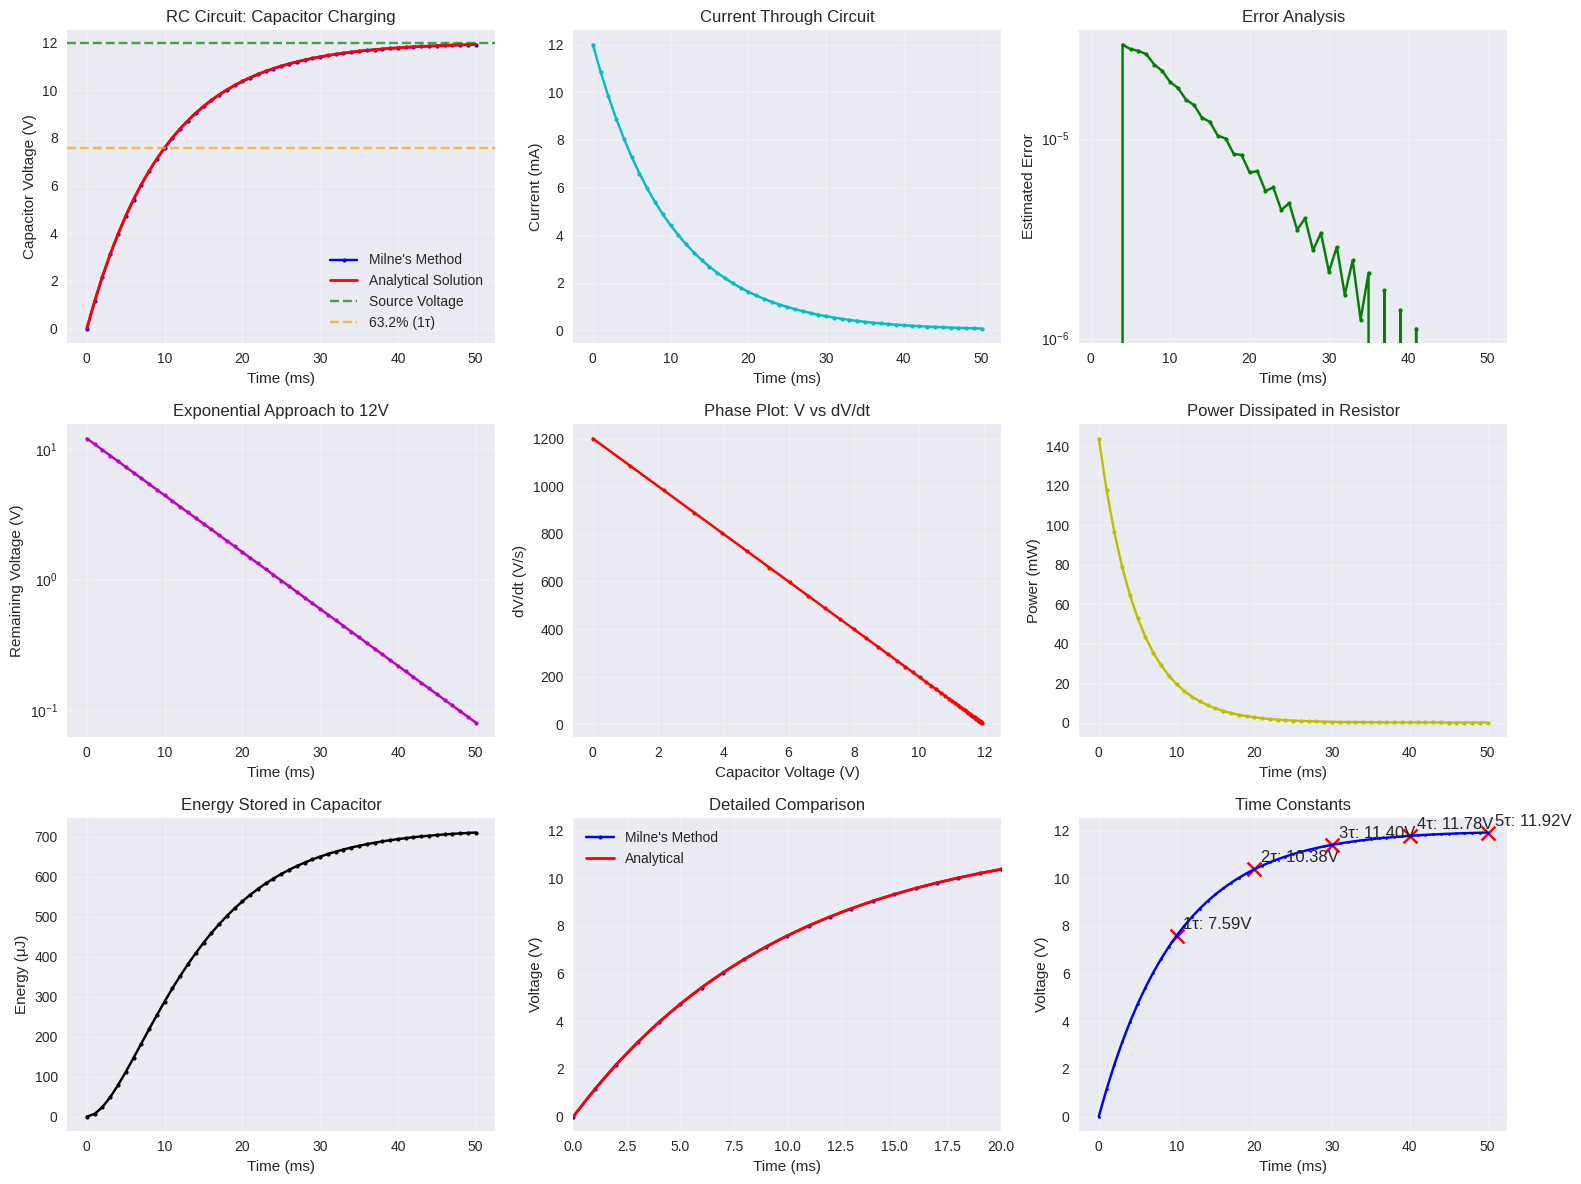


=== DETAILED RESULTS TABLE ===
    Time (ms)  Milnes V_C (V)  Analytical V_C (V)  Current (mA)  Power (mW)  \
0         0.0        0.000000            0.000000     12.000000  144.000000   
1         5.0        4.721632            4.721632      7.278368   52.974646   
2        10.0        7.585450            7.585447      4.414550   19.488252   
3        15.0        9.322441            9.322438      2.677559    7.169324   
4        20.0       10.375980           10.375977      1.624020    2.637440   
5        25.0       11.014982           11.014980      0.985018    0.970261   
6        30.0       11.402558           11.402555      0.597442    0.356937   
7        35.0       11.637632           11.637631      0.362368    0.131311   
8        40.0       11.780213           11.780212      0.219787    0.048306   
9        45.0       11.866691           11.866692      0.133309    0.017771   
10       50.0       11.919146           11.919145      0.080854    0.006537   

    Energy (μJ)  Ab

In [8]:
## Solution to Problem 3: RC Circuit Analysis

# Define the differential equation: dV_C/dt = (V_source - V_C) / (RC)
def rc_circuit(t, V_C):
    V_source = 12        # source voltage (V)
    R = 1000            # resistance (Ω)
    C = 10e-6           # capacitance (F) - 10 microfarads
    tau = R * C         # time constant
    return (V_source - V_C) / tau

# Parameters
t0 = 0          # initial time
V_C0 = 0        # initial capacitor voltage (V)
t_end = 0.05    # final time (50 ms)
h = 0.001       # step size (1 ms)

print("=== PROBLEM 3: RC CIRCUIT CAPACITOR CHARGING ===")
print(f"Source voltage: 12V")
print(f"Resistance: 1000Ω")
print(f"Capacitance: 10μF")
print(f"Time constant τ = RC = {1000 * 10e-6:.3f}s = {1000 * 10e-6 * 1000:.1f}ms")
print(f"Initial capacitor voltage: {V_C0}V")
print(f"Time period: {t0*1000} to {t_end*1000}ms")
print(f"Step size: {h*1000}ms")
print()

# Solve using Milne's method
t_values, V_C_values, errors = milnes_method(rc_circuit, t0, V_C0, t_end, h)

# Analytical solution for comparison
def analytical_rc(t):
    tau = 1000 * 10e-6  # time constant
    return 12 * (1 - np.exp(-t / tau))

t_analytical = np.linspace(t0, t_end, 100)
V_C_analytical = analytical_rc(t_analytical)

# Display results
print(f"\nFinal Results after {t_end*1000}ms:")
print(f"Milne's Method: {V_C_values[-1]:.4f}V")
print(f"Analytical Solution: {analytical_rc(t_end):.4f}V")
print(f"Absolute Error: {abs(V_C_values[-1] - analytical_rc(t_end)):.8f}V")
print(f"Relative Error: {abs(V_C_values[-1] - analytical_rc(t_end))/analytical_rc(t_end)*100:.6f}%")
print(f"Percentage of full charge: {V_C_values[-1]/12*100:.2f}%")

# Calculate current through the circuit
def current_calculation(t_vals, V_C_vals):
    R = 1000
    V_source = 12
    return [(V_source - V_C) / R * 1000 for V_C in V_C_vals]  # Convert to mA

I_values = current_calculation(t_values, V_C_values)

# Plot the results
plt.figure(figsize=(16, 12))

# Voltage vs Time
plt.subplot(3, 3, 1)
plt.plot(t_values*1000, V_C_values, 'bo-', label="Milne's Method", markersize=3)
plt.plot(t_analytical*1000, V_C_analytical, 'r-', label='Analytical Solution', linewidth=2)
plt.axhline(y=12, color='g', linestyle='--', alpha=0.7, label='Source Voltage')
plt.axhline(y=12*0.632, color='orange', linestyle='--', alpha=0.7, label='63.2% (1τ)')
plt.xlabel('Time (ms)')
plt.ylabel('Capacitor Voltage (V)')
plt.title('RC Circuit: Capacitor Charging')
plt.legend()
plt.grid(True, alpha=0.3)

# Current vs Time
plt.subplot(3, 3, 2)
plt.plot(t_values*1000, I_values, 'co-', markersize=3)
plt.xlabel('Time (ms)')
plt.ylabel('Current (mA)')
plt.title('Current Through Circuit')
plt.grid(True, alpha=0.3)

# Error Analysis
plt.subplot(3, 3, 3)
plt.semilogy(t_values[1:]*1000, errors[1:], 'go-', markersize=3)
plt.xlabel('Time (ms)')
plt.ylabel('Estimated Error')
plt.title('Error Analysis')
plt.grid(True, alpha=0.3)

# Exponential approach to final value
plt.subplot(3, 3, 4)
remaining_voltage = 12 - V_C_values
plt.semilogy(t_values*1000, remaining_voltage, 'mo-', markersize=3)
plt.xlabel('Time (ms)')
plt.ylabel('Remaining Voltage (V)')
plt.title('Exponential Approach to 12V')
plt.grid(True, alpha=0.3)

# Phase plot: Voltage vs Rate of Change
plt.subplot(3, 3, 5)
dV_dt = [rc_circuit(t_values[i], V_C_values[i]) for i in range(len(t_values))]
plt.plot(V_C_values, dV_dt, 'ro-', markersize=3)
plt.xlabel('Capacitor Voltage (V)')
plt.ylabel('dV/dt (V/s)')
plt.title('Phase Plot: V vs dV/dt')
plt.grid(True, alpha=0.3)

# Power dissipated in resistor
plt.subplot(3, 3, 6)
P_resistor = [(I/1000)**2 * 1000 * 1000 for I in I_values]  # Power in mW
plt.plot(t_values*1000, P_resistor, 'yo-', markersize=3)
plt.xlabel('Time (ms)')
plt.ylabel('Power (mW)')
plt.title('Power Dissipated in Resistor')
plt.grid(True, alpha=0.3)

# Energy stored in capacitor
plt.subplot(3, 3, 7)
C = 10e-6
E_capacitor = [0.5 * C * V**2 * 1e6 for V in V_C_values]  # Energy in μJ
plt.plot(t_values*1000, E_capacitor, 'ko-', markersize=3)
plt.xlabel('Time (ms)')
plt.ylabel('Energy (μJ)')
plt.title('Energy Stored in Capacitor')
plt.grid(True, alpha=0.3)

# Comparison of voltage approaches
plt.subplot(3, 3, 8)
plt.plot(t_values*1000, V_C_values, 'bo-', label="Milne's Method", markersize=3)
plt.plot(t_analytical*1000, V_C_analytical, 'r-', label='Analytical', linewidth=2)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Detailed Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 20)  # Zoom in on first 20ms

# Time constants visualization
plt.subplot(3, 3, 9)
tau = 1000 * 10e-6
time_constants = np.array([1, 2, 3, 4, 5]) * tau * 1000  # in ms
voltage_at_tau = [analytical_rc(tc/1000) for tc in time_constants]
plt.plot(t_values*1000, V_C_values, 'bo-', markersize=2)
plt.scatter(time_constants, voltage_at_tau, c='red', s=100, marker='x')
for i, (tc, v) in enumerate(zip(time_constants, voltage_at_tau)):
    plt.annotate(f'{i+1}τ: {v:.2f}V', (tc, v), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Time Constants')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create summary table
print("\n=== DETAILED RESULTS TABLE ===")
results_df = pd.DataFrame({
    'Time (ms)': (t_values*1000)[::5],  # Show every 5th point
    'Milnes V_C (V)': V_C_values[::5],
    'Analytical V_C (V)': [analytical_rc(t) for t in t_values[::5]],
    'Current (mA)': np.array(I_values)[::5],
    'Power (mW)': np.array(P_resistor)[::5],
    'Energy (μJ)': np.array(E_capacitor)[::5],
    'Abs Error': [abs(V_C_values[i] - analytical_rc(t_values[i])) for i in range(0, len(t_values), 5)]
})
print(results_df.round(6))